# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 33 - Thompson Sampling/Python/Ads_CTR_Optimisation.csv')

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [4]:
dataset

Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]

## Implementing Thompson Sampling

In [16]:
import random

N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

print('INITIALIZE ALL VALUES')
print('N:', N)
print('d:', d)
print('ads_selected:', ads_selected)
print('numbers_of_rewards_1:', numbers_of_rewards_1)
print('numbers_of_rewards_0:', numbers_of_rewards_0)
print('total_reward:', total_reward)

for n in range(0, N):

  ad = 0
  max_random = 0

  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

    if (random_beta > max_random):
      max_random = random_beta
      ad = i

  ads_selected.append(ad)
  reward = dataset.values[n, ad]

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_reward = total_reward + reward

print()
print('------------------------')
print()
print('FINAL RESULTS')
print('ads_selected:', ads_selected) # order of highes score for the slot machines
print('numbers_of_rewards_1:', numbers_of_rewards_1)
print('numbers_of_rewards_0:', numbers_of_rewards_0)
print('total_reward:', total_reward)

INITIALIZE ALL VALUES
N: 10000
d: 10
ads_selected: []
numbers_of_rewards_1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
numbers_of_rewards_0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
total_reward: 0

------------------------

FINAL RESULTS
ads_selected: [1, 9, 4, 0, 6, 7, 0, 8, 8, 8, 3, 5, 2, 3, 4, 7, 6, 6, 6, 9, 7, 7, 7, 5, 7, 4, 0, 7, 3, 1, 2, 7, 6, 7, 8, 0, 7, 3, 7, 9, 8, 5, 2, 8, 5, 7, 1, 2, 4, 8, 3, 5, 7, 3, 1, 0, 6, 9, 6, 9, 8, 7, 0, 5, 8, 7, 3, 7, 7, 7, 3, 6, 8, 0, 7, 0, 1, 7, 7, 8, 3, 3, 2, 8, 2, 3, 9, 1, 7, 3, 5, 6, 8, 1, 7, 9, 7, 5, 5, 7, 7, 7, 7, 7, 7, 8, 7, 4, 4, 7, 1, 4, 7, 4, 4, 9, 4, 1, 7, 5, 4, 0, 1, 4, 3, 7, 8, 4, 4, 2, 2, 9, 5, 8, 2, 2, 2, 2, 7, 1, 9, 2, 3, 7, 7, 4, 7, 9, 1, 8, 1, 4, 8, 4, 7, 8, 7, 8, 8, 8, 3, 4, 2, 8, 7, 2, 7, 2, 8, 8, 8, 6, 1, 8, 8, 0, 7, 8, 8, 0, 1, 0, 7, 1, 8, 9, 4, 3, 8, 7, 3, 7, 8, 8, 8, 4, 7, 8, 7, 8, 7, 8, 7, 7, 7, 4, 7, 6, 6, 8, 6, 6, 4, 0, 4, 4, 4, 5, 3, 4, 7, 8, 4, 8, 6, 8, 1, 3, 8, 4, 8, 7, 4, 5, 8, 2, 7, 8, 4, 7, 7, 3, 7, 1, 8, 3, 4, 8, 8, 2, 6, 9, 2, 7, 1, 7, 

## Visualising the results - Histogram

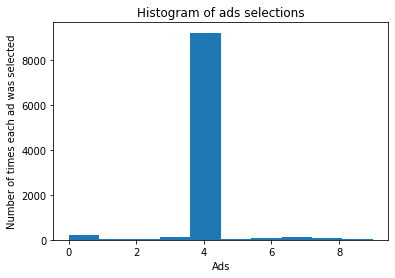

In [15]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()